In [217]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from pymongo import MongoClient
import matplotlib.pyplot as plt
import datetime
import time
import pandas as pd

#Connection to Database
client = MongoClient()
db = client['ws']
collections = db['tweets']

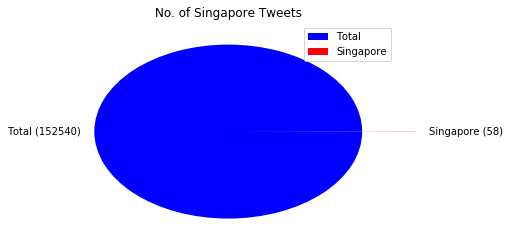

In [218]:
#Get all tweets in collections
total_tweets = collections.find().count()

#Get all tweets in SG
sg_count = collections.find({"geo" : {"$ne" : None}, "place.country_code" : "SG"}).count()

#Plot Data
values = [total_tweets, sg_count]
colors = ['b', 'r']
names = ['Total', 'Singapore']

explode = [0, 0.4]
plt.pie(values,
        colors=colors,
        labels=["{} ({})".format(l, v) for l, v in zip(names, values)],
        explode=explode
       )
plt.title("No. of Singapore Tweets")
plt.legend(names)
plt.show()

In [219]:
first = datetime.datetime.strptime(collections.find_one()["retrieved_at"], '%H:%M:%S.%f').strftime('%H:%M:%S')
first = datetime.datetime.strptime(first, '%H:%M:%S')

#Total count
def PartA():
    i = 10
    count_l = [collections.find({"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=i)).time())}}).count()]

    while i < 60:
        i += 10
        if i < 50:
            count_l.append(collections.find({"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=i)).time())}}).count())
        else:
            count_l.append(collections.find({"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=(i+1))).time())}}).count())

    df = pd.DataFrame({'duration':['10', '20', '30', '40', '50', '60'], 'Total Tweets':count_l})
    return df

#Singapore geo-tagged count
def PartB():
    i = 10
    count_l = [collections.find({"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=i)).time())}, "geo" :{"$ne" : None}, "place.country_code" : "SG"}).count()]

    while i < 60:
        i += 10
        if i < 50:
            count_l.append(collections.find({"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=i)).time())}, "geo" :{"$ne" : None}, "place.country_code" : "SG"}).count())
        else:
            count_l.append(collections.find({"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=(i+1))).time())}, "geo" :{"$ne" : None}, "place.country_code" : "SG"}).count())

    df = pd.DataFrame({'duration':['10', '20', '30', '40', '50', '60'], 'Singapore Geo-Tagged Tweets':count_l})

    return df

#Total count, duplicate count, geo-tagged count, duplicate geo-tagged count
def PartC():
    i = 10
    total_count = collections.find({"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=i)).time())}}).count()
    dup_data = total_count - len(collections.distinct("id", {"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=i)).time())}}))
    geotag = collections.find({"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=i)).time())}, "geo" :{"$ne" : None}}).count()
    dup_geotag = geotag - len(collections.distinct("id", {"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=i)).time())}, "geo" :{"$ne" : None}}))
    count_l = [dup_data]

    while i < 60:
        i += 10
        if i < 50:
            total_count = collections.find({"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=i)).time())}}).count()
            dup_data = total_count - len(collections.distinct("id", {"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=i)).time())}}))
            geotag = collections.find({"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=i)).time())}, "geo" :{"$ne" : None}}).count()
            dup_geotag = geotag - len(collections.distinct("id", {"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=i)).time())}, "geo" :{"$ne" : None}}))
        else:
            total_count = collections.find({"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=(i+1))).time())}}).count()
            dup_data = total_count - len(collections.distinct("id", {"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=(i+1))).time())}}))
            geotag = collections.find({"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=(i+1))).time())}, "geo" :{"$ne" : None}}).count()
            dup_geotag = geotag - len(collections.distinct("id", {"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=(i+1))).time())}, "geo" :{"$ne" : None}}))
        count_l.append(dup_data)

    df = pd.DataFrame({'duration':['10', '20', '30', '40', '50', '60'], 'Duplicated Tweets': count_l})

    return df

#Total count, retweeted count, quoted count
def PartD():
    i = 10
    total_count = collections.find({"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=i)).time())}}).count()
    retweet_count = collections.find({"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=i)).time())}, "retweeted_status" : {"$ne" : None}}).count()
    quote_count = collections.find({"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=i)).time())}, "is_quote_status" : True}).count()
    retweet_l = [retweet_count]
    quote_l = [quote_count]

    while i < 60:
        i += 10
        if i < 50:
            total_count = collections.find({"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=i)).time())}}).count()
            retweet_count = collections.find({"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=i)).time())}, "retweeted_status" : {"$ne" : None}}).count()
            quote_count = collections.find({"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=i)).time())}, "is_quote_status" : True}).count()
        else:
            total_count = collections.find({"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=(i+1))).time())}}).count()
            retweet_count = collections.find({"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=(i+1))).time())}, "retweeted_status" : {"$ne" : None}}).count()
            quote_count = collections.find({"retrieved_at": {"$gte": str(first.time()), "$lt": str((first + datetime.timedelta(minutes=(i+1))).time())}, "is_quote_status" : True}).count()
        retweet_l.append(retweet_count)
        quote_l.append(quote_count)
        
    df = pd.DataFrame({'duration':['10', '20', '30', '40', '50', '60'], 'Retweeted Tweets': retweet_l})
    df2 = pd.DataFrame({'duration':['10', '20', '30', '40', '50', '60'], 'Quote Tweets': quote_l})
    
    return df, df2

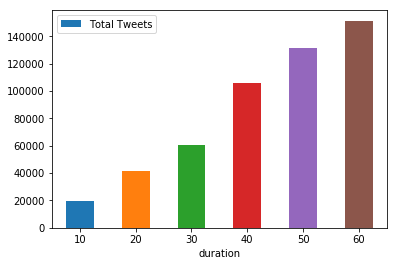

In [220]:
part_a = PartA()
part_a.plot.bar(x = 'duration', y = 'Total Tweets', rot = 0)

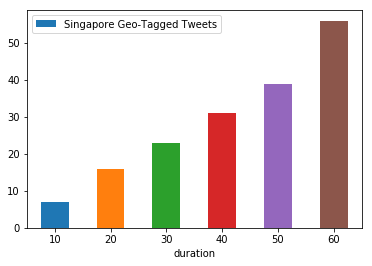

In [221]:
part_b = PartB()
part_b.plot.bar(x = 'duration', y = 'Singapore Geo-Tagged Tweets', rot = 0)

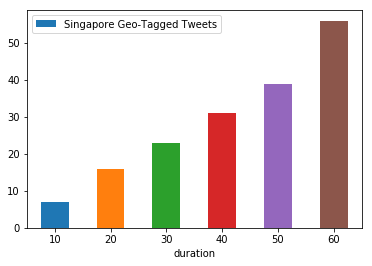

In [222]:
part_b = PartB()
part_b.plot.bar(x = 'duration', y = 'Singapore Geo-Tagged Tweets', rot = 0)

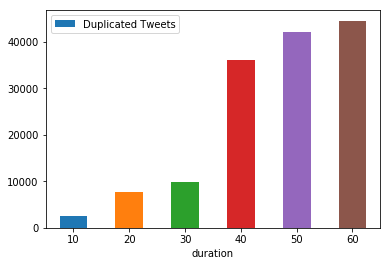

In [216]:
part_c = PartC()
part_c.plot.bar(x = 'duration', y = 'Duplicated Tweets', rot = 0)